In [1]:
import matplotlib as mpl
#mpl.use('Agg')
from scipy.io import netcdf
import matplotlib
#from numpy import *
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import datetime
from datetime import date
from pylab import *
import xarray
%matplotlib inline

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

#from mpl_toolkits.basemap import Basemap




#### Data is not yet ready for this, hopefully on Monday!

In [2]:
fnameu = '/g/data/rt52/era5/pressure-levels/reanalysis/u/2022/u_era5_oper_pl_20220301-20220331.nc'
fnamev = '/g/data/rt52/era5/pressure-levels/reanalysis/v/2022/v_era5_oper_pl_20220301-20220331.nc'

In [3]:
ds = xarray.open_dataset(fnameu)
u_all = ds.u

lon = ds.longitude
lat = ds.latitude
levels = ds.level

u = u_all.sel(longitude=slice(148,160), latitude=slice(-24,-36), level=slice(850,851), time=slice('2022-03-30','2022-03-30T00:30:00'))
longitude = lon.sel(longitude=slice(148,160))
latitude = lat.sel(latitude=slice(-24,-36))
lon2d, lat2d = np.meshgrid(longitude, latitude)

ds = xarray.open_dataset(fnamev)
v_all = ds.v

lon = ds.longitude
lat = ds.latitude
levels = ds.level

v = v_all.sel(longitude=slice(148,160), latitude=slice(-24,-36), level=slice(850,851), time=slice('2022-03-30','2022-03-30T00:30:00'))

print(u)

<xarray.DataArray 'u' (time: 1, level: 1, latitude: 49, longitude: 49)>
array([[[[ 4.470799, ...,  5.613845],
         ...,
         [ 1.333256, ..., -7.391216]]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 148.0 148.2 148.5 148.8 ... 159.5 159.8 160.0
  * latitude   (latitude) float32 -24.0 -24.25 -24.5 ... -35.5 -35.75 -36.0
  * level      (level) int32 850
  * time       (time) datetime64[ns] 2022-03-30
Attributes:
    units:          m s**-1
    long_name:      U component of wind
    standard_name:  eastward_wind


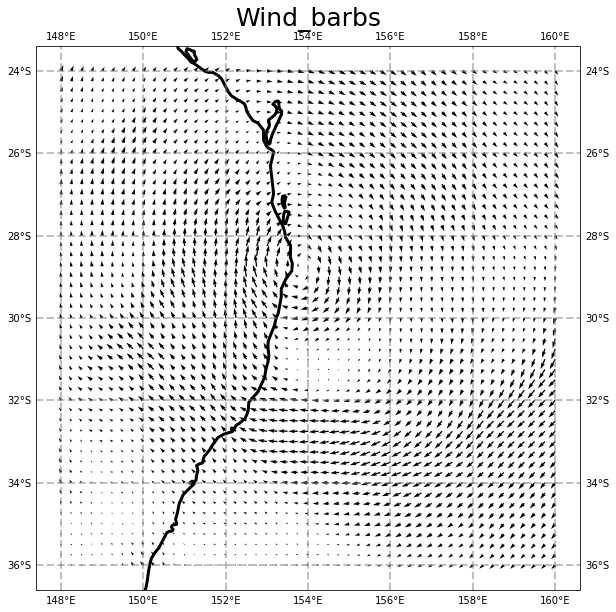

In [4]:
levels = np.arange(2,15,0.2)
plt.figure(figsize=(10, 10))
levels = np.arange(-20,20,2)
src = ccrs.PlateCarree()
ax = plt.axes(projection=src)
cmap=matplotlib.cm.get_cmap('Spectral_r')
#ch = ax.contourf(lon2d, lat2d, np.sqrt(np.squeeze(v)**2 + np.squeeze(u)**2), levels=levels,colors='k')
ax.quiver(lon2d, lat2d, np.squeeze(u),  np.squeeze(v))
#ax.clabel(ch, ch.levels, inline=True, fontsize=20)
title = 'Wind_barbs'
plt.title(title, size=25)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
ax.coastlines('50m', linewidth=3)

In [5]:
ncfile = Dataset('vorticity_divergence_data.nc','w')
nlon = len(longitude)
nlat = len(latitude)
ncfile.createDimension('longitude',nlon)
ncfile.createDimension('latitude',nlat)
ncfile.summary = 'U and V 850hPa wind components, 30 March 2022 00UTC'
ncfile.creator_name = 'Claire Vincent'
ncfile.date_created = '11 August 2022'
# Define the coordinate variables. They will hold the coordinate
# information, that is, the latitudes and longitudes.
# Coordinate variables only given for lat and lon.
latsnc = ncfile.createVariable('latitude',np.float32,('latitude',))
lonsnc = ncfile.createVariable('longitude',np.float32,('longitude',))
# Variables
unc = ncfile.createVariable('U', np.float32,('latitude','longitude'),zlib=True)
vnc = ncfile.createVariable('V', np.float32,('latitude','longitude'),zlib=True)

unc[:,:] = np.squeeze(u)[:,:]
vnc[:,:] = np.squeeze(v)[:,:]

lonsnc[:] = longitude[:]
latsnc[:] = latitude[:]

ncfile.close()

You can use the xarray to_netcdf() function to save a dataset or an array to netcdf. You can also compress the data passing the `encoding` dictionary. See below for an example.

In [ ]:
encoding = {}
for var in ['U', 'V']:
    encoding[var] = {
          'zlib': True, # Turn on compression
        'shuffle': True, # Turn on shuffle filter
         'complevel': 5, # Compression amount (0-9), 5 is a good compromise
         'dtype': 'float32',
        'chunksizes': [12, 212, 260]}

In [ ]:
outds = xr.merge(['U', 'V'])
# You can change/add also attributes
# It will automatically save all the coordinates attached to the variables
outds.to_netcdf('outfile.nc', encoding=encoding)